In [ ]:
# !wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/AMAZON_FASHION.json.gz
# !wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_AMAZON_FASHION.json.gz
# !wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFiles/Clothing_Shoes_and_Jewelry.json.gz
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/metaFiles2/meta_Clothing_Shoes_and_Jewelry.json.gz

--2022-12-03 14:25:49--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 287013 (280K) [application/x-gzip]
Saving to: ‘AMAZON_FASHION_5.json.gz’

AMAZON_FASHION_5.js 100%[===================>] 280.29K  --.-KB/s    in 0.04s   

2022-12-03 14:25:49 (6.60 MB/s) - ‘AMAZON_FASHION_5.json.gz’ saved [287013/287013]

--2022-12-03 14:25:49--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/AMAZON_FASHION.csv
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 36881609 (35M) [text/csv]
Savin

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
ratings = pd.read_csv('/content/AMAZON_FASHION.csv', names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
ratings

,asin,reviewerID,overall,unixReviewTime
0,7106116521,A1D4G1SNUZWQOT,5.0,1413763200
1,7106116521,A3DDWDH9PX2YX2,2.0,1411862400
2,7106116521,A2MWC41EW7XL15,4.0,1408924800
3,7106116521,A2UH2QQ275NV45,2.0,1408838400
4,7106116521,A89F3LQADZBS5,3.0,1406419200
...,...,...,...,...
883631,B01HJHTH5U,A1ZSB2Q144UTEY,5.0,1487635200
883632,B01HJHTH5U,A2CCDV0J5VB6F2,5.0,1480032000
883633,B01HJHTH5U,A3O90PACS7B61K,3.0,1478736000
883634,B01HJHF97K,A2HO94I89U3LNH,3.0,1478736000


In [ ]:
rates = pd.DataFrame.from_dict(ratings)

In [ ]:
rates['overall'].value_counts()     

5.0    465476
4.0    149331
1.0    107080
3.0     97031
2.0     64718
Name: overall, dtype: int64

In [ ]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883636 entries, 0 to 883635
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            883636 non-null  object 
 1   reviewerID      883636 non-null  object 
 2   overall         883636 non-null  float64
 3   unixReviewTime  883636 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 27.0+ MB


In [ ]:
rates.duplicated().value_counts()                     # rating has 7937 of 883636 duplicated 

False    875699
True       7937
dtype: int64

In [ ]:
data = []
with gzip.open('/content/AMAZON_FASHION_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

data[:3]

[{'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'style': {'Size:': ' Big Boys', 'Color:': ' Blue/Orange'},
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'style': {'Size:': ' Big Boys', 'Color:': ' Black (37467610) / Red/White'},
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800},
 {'overall': 5.0,
  'verified': True,
  'reviewTime': '09 4, 2015',
  'reviewerID': 'ALJ66O1Y6SLHA',
  'asin': 'B000K2PJ4K',
  'style': {'Size:': ' Big Boys', 'Color:': ' Blue/Gray Logo'},
  'reviewerName': 'Tonya B.',
  'reviewText': 'Great product and price!',
  'summary': 'Five Stars',
  'unixReviewTime': 1441324800}]

In [ ]:
df = pd.DataFrame.from_dict(data)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN


In [ ]:
df.shape

(3176, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   float64
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   style           3107 non-null   object 
 6   reviewerName    3176 non-null   object 
 7   reviewText      3160 non-null   object 
 8   summary         3176 non-null   object 
 9   unixReviewTime  3176 non-null   int64  
 10  vote            297 non-null    object 
 11  image           106 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 276.2+ KB


In [ ]:
df.describe()

,overall,unixReviewTime
count,3176.000000,3.176000e+03
mean,4.404282,1.492211e+09
std,1.034964,2.396788e+07
min,1.000000,1.261699e+09
25%,4.000000,1.479859e+09
50%,5.000000,1.492560e+09
75%,5.000000,1.508803e+09
max,5.000000,1.530749e+09


# image column has 3070 of 3176 missing value, it's a big number 
# vote has 2879 of 3176 also big number

In [ ]:
df.isnull().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style               69
reviewerName         0
reviewText          16
summary              0
unixReviewTime       0
vote              2879
image             3070
dtype: int64

In [ ]:
df['vote'].value_counts()

2     92
3     72
5     32
4     18
7     16
8     16
20    10
6      8
14     8
22     7
10     6
35     5
19     4
11     2
21     1
Name: vote, dtype: int64

In [ ]:
df['overall'].value_counts()                        # rates['overall'] and overall has same ratings 

5.0    2158
4.0     471
3.0     337
1.0     117
2.0      93
Name: overall, dtype: int64

(array([   0.,  117.,   93.,  337., 2629.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

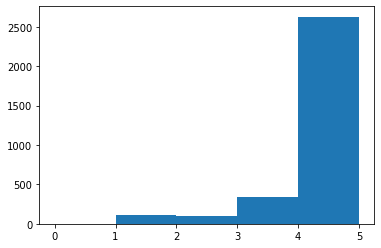

In [ ]:
plt.hist(df['overall'], bins=np.arange(0, 6))

In [ ]:
df['verified'].value_counts()

True     3079
False      97
Name: verified, dtype: int64

In [ ]:
df['summary'].value_counts()            # summary and reviewText are the same we can use one of them and drop the other 

Five Stars                                  919
Four Stars                                  127
Three Stars                                  64
One Star                                     40
Love these shoes                             32
                                           ... 
Good just watch the seams!                    1
Love these pants!                             1
Soft. Strong. Comfortable!!                   1
Good                                          1
Cold wash or you'll be handing this down      1
Name: summary, Length: 274, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff15ac41730>,
      dtype=object)

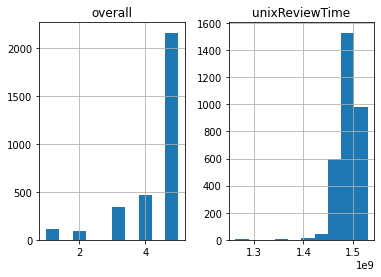

In [ ]:
df.hist()

In [ ]:
df['reviewText'].value_counts()

Perfect!                                                                                                                                                                                                           24
Very comfortable.                                                                                                                                                                                                  16
Nice                                                                                                                                                                                                               16
Nice shoes                                                                                                                                                                                                         16
I needed a wide size, that option was not available. So I went up a half size bigger hoping that would work. It's not quite comfortable but I am

In [ ]:
styles = list(df['style'])
df.drop('style', axis=1, inplace=True)
styles[:5]

[{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'},
 {'Size:': ' Big Boys', 'Color:': ' Black (37467610) / Red/White'},
 {'Size:': ' Big Boys', 'Color:': ' Blue/Gray Logo'},
 {'Size:': ' Big Boys', 'Color:': ' Blue (37867638-99) / Yellow'},
 {'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}]

In [ ]:
styles = pd.json_normalize(styles)
styles

,Size:,Color:,Size Name:,Style:
0,Big Boys,Blue/Orange,NaN,NaN
1,Big Boys,Black (37467610) / Red/White,NaN,NaN
2,Big Boys,Blue/Gray Logo,NaN,NaN
3,Big Boys,Blue (37867638-99) / Yellow,NaN,NaN
4,Big Boys,Blue/Pink,NaN,NaN
...,...,...,...,...
3171,8.5 B(M) US,Green Glow/Seaweed - Hasta - White,NaN,NaN
3172,5 B(M) US,Wolf Grey/Black-pink Blast/White,NaN,NaN
3173,8 B(M) US,Blue Tint/Green Glow/Hasta/White,NaN,NaN
3174,9 B(M) US,Blue Tint/Green Glow/Hasta/White,NaN,NaN


In [ ]:
col_names = {'Size:' : 'size',
             'Color:' : 'color',
             'Size Name:' : 'sizeName',
              'Style:' : 'style'
              }
              
styles.rename(columns = col_names, inplace = True)

styles.head()

,size,color,sizeName,style
0,Big Boys,Blue/Orange,NaN,NaN
1,Big Boys,Black (37467610) / Red/White,NaN,NaN
2,Big Boys,Blue/Gray Logo,NaN,NaN
3,Big Boys,Blue (37867638-99) / Yellow,NaN,NaN
4,Big Boys,Blue/Pink,NaN,NaN


In [ ]:
df = pd.concat([df, styles], axis=1)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,size,color,sizeName,style
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,Big Boys,Blue/Orange,NaN,NaN
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,Big Boys,Black (37467610) / Red/White,NaN,NaN
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,Big Boys,Blue/Gray Logo,NaN,NaN
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,Big Boys,Blue (37867638-99) / Yellow,NaN,NaN
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN,Big Boys,Blue/Pink,NaN,NaN


In [ ]:
df[df.reviewerID == 'A3OP70LPLALBKN']

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,size,color,sizeName,style
224,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B001IKJOLW,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Hyper Jade/Mtlc Silver/Hyper Turq,NaN,NaN
225,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B001IKJOLW,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Energy/Mtlc Silver/Black,NaN,NaN
587,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B0058YEJ5K,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Hyper Jade/Mtlc Silver/Hyper Turq,NaN,NaN
588,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B0058YEJ5K,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Energy/Mtlc Silver/Black,NaN,NaN
942,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B0014F7B98,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Hyper Jade/Mtlc Silver/Hyper Turq,NaN,NaN
943,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B0014F7B98,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Energy/Mtlc Silver/Black,NaN,NaN
1310,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B009MA34NY,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Hyper Jade/Mtlc Silver/Hyper Turq,NaN,NaN
1311,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B009MA34NY,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Energy/Mtlc Silver/Black,NaN,NaN
1679,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B0092UF54A,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Hyper Jade/Mtlc Silver/Hyper Turq,NaN,NaN
1680,5.0,True,"11 27, 2017",A3OP70LPLALBKN,B0092UF54A,Chelsea,Perfect!,Five Stars,1511740800,NaN,NaN,9 B(M) US,Energy/Mtlc Silver/Black,NaN,NaN


In [ ]:
df[df.reviewerID == 'A3CNRM11BHAR1A']

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,size,color,sizeName,style
70,5.0,True,"07 22, 2015",A3CNRM11BHAR1A,B0012DR1LU,DD,Havaiana's are THE BEST!!!,Five Stars,1437523200,NaN,NaN,NaN,NaN,NaN,NaN
71,5.0,True,"08 6, 2014",A3CNRM11BHAR1A,B0012DR1LU,DD,Perfect color!,I love Havaianas!,1407283200,NaN,NaN,NaN,NaN,NaN,NaN
134,5.0,True,"07 22, 2015",A3CNRM11BHAR1A,B0012DR1LU,DD,Havaiana's are THE BEST!!!,Five Stars,1437523200,NaN,NaN,NaN,NaN,NaN,NaN
135,5.0,True,"08 6, 2014",A3CNRM11BHAR1A,B0012DR1LU,DD,Perfect color!,I love Havaianas!,1407283200,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   float64
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   reviewerName    3176 non-null   object 
 6   reviewText      3160 non-null   object 
 7   summary         3176 non-null   object 
 8   unixReviewTime  3176 non-null   int64  
 9   vote            297 non-null    object 
 10  image           106 non-null    object 
 11  size            3102 non-null   object 
 12  color           3095 non-null   object 
 13  sizeName        2 non-null      object 
 14  style           3 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(12)
memory usage: 350.6+ KB


In [ ]:
images = df['image']
df.drop('image', axis=1, inplace=True)
images[images.isna() == False].head(20)

164    [https://images-na.ssl-images-amazon.com/image...
172    [https://images-na.ssl-images-amazon.com/image...
179    [https://images-na.ssl-images-amazon.com/image...
192    [https://images-na.ssl-images-amazon.com/image...
197    [https://images-na.ssl-images-amazon.com/image...
207    [https://images-na.ssl-images-amazon.com/image...
214    [https://images-na.ssl-images-amazon.com/image...
318    [https://images-na.ssl-images-amazon.com/image...
319    [https://images-na.ssl-images-amazon.com/image...
359    [https://images-na.ssl-images-amazon.com/image...
381    [https://images-na.ssl-images-amazon.com/image...
398    [https://images-na.ssl-images-amazon.com/image...
458    [https://images-na.ssl-images-amazon.com/image...
527    [https://images-na.ssl-images-amazon.com/image...
535    [https://images-na.ssl-images-amazon.com/image...
542    [https://images-na.ssl-images-amazon.com/image...
555    [https://images-na.ssl-images-amazon.com/image...
560    [https://images-na.ssl-i

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=['reviewerID', 'asin', 'unixReviewTime']).head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,size,color,sizeName,style
81,3.0,True,"12 14, 2012",A12DWXDNZQTKXQ,B0017LD0BM,TDL Chicago,"they are fine for the value, particularly sinc...",loose screws,1355443200,NaN,2.75,NaN,NaN,NaN
145,3.0,True,"12 14, 2012",A12DWXDNZQTKXQ,B0017LD0BM,TDL Chicago,"they are fine for the value, particularly sinc...",loose screws,1355443200,NaN,2.75,NaN,NaN,NaN
86,3.0,True,"12 14, 2012",A12DWXDNZQTKXQ,B0017LGD34,TDL Chicago,"they are fine for the value, particularly sinc...",loose screws,1355443200,NaN,NaN,NaN,NaN,NaN
150,3.0,True,"12 14, 2012",A12DWXDNZQTKXQ,B0017LGD34,TDL Chicago,"they are fine for the value, particularly sinc...",loose screws,1355443200,NaN,NaN,NaN,NaN,NaN
58,5.0,True,"06 16, 2017",A1EZN3E9R322YJ,B000YFSR4W,wayne ereira,"Typical Hanes quality. Good weight, sized just...",Typical Quality,1497571200,NaN,XXX-Large,Deep Royal,NaN,NaN
122,5.0,True,"06 16, 2017",A1EZN3E9R322YJ,B000YFSR4W,wayne ereira,"Typical Hanes quality. Good weight, sized just...",Typical Quality,1497571200,NaN,XXX-Large,Deep Royal,NaN,NaN
31,5.0,True,"06 16, 2017",A1EZN3E9R322YJ,B000YFSR5G,wayne ereira,"Typical Hanes quality. Good weight, sized just...",Typical Quality,1497571200,NaN,XXX-Large,Deep Royal,NaN,NaN
95,5.0,True,"06 16, 2017",A1EZN3E9R322YJ,B000YFSR5G,wayne ereira,"Typical Hanes quality. Good weight, sized just...",Typical Quality,1497571200,NaN,XXX-Large,Deep Royal,NaN,NaN
69,3.0,True,"02 1, 2017",A1G0HYMR02WM2W,B000YFSR4W,Cici Ciconia,As described.,Three Stars,1485907200,NaN,XXX-Large,Light Steel,NaN,NaN
133,3.0,True,"02 1, 2017",A1G0HYMR02WM2W,B000YFSR4W,Cici Ciconia,As described.,Three Stars,1485907200,NaN,XXX-Large,Light Steel,NaN,NaN


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,overall,unixReviewTime
count,3108.000000,3.108000e+03
mean,4.422136,1.492941e+09
std,1.020889,2.201322e+07
min,1.000000,1.261699e+09
25%,4.000000,1.480205e+09
50%,5.000000,1.492992e+09
75%,5.000000,1.508890e+09
max,5.000000,1.530749e+09


In [ ]:
df[df['sizeName'].isna() == False]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,size,color,sizeName,style
10,2.0,True,"01 25, 2018",A3HX4X3TIABWOV,B000KPIHQ4,Denise A. Conte,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,1516838400,NaN,NaN,NaN,"Men's 6-6.5, Women's 8-8.5",Pinnacle
11,2.0,True,"01 5, 2017",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,1483574400,NaN,NaN,NaN,"Men's 8-8.5, Women's 10-10.5",Pinnacle


In [ ]:
df[df['style'].isna() == False]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,size,color,sizeName,style
10,2.0,True,"01 25, 2018",A3HX4X3TIABWOV,B000KPIHQ4,Denise A. Conte,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,1516838400,NaN,NaN,NaN,"Men's 6-6.5, Women's 8-8.5",Pinnacle
11,2.0,True,"01 5, 2017",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,1483574400,NaN,NaN,NaN,"Men's 8-8.5, Women's 10-10.5",Pinnacle
3130,4.0,True,"12 18, 2017",A1EZN3E9R322YJ,B003M6060S,wayne ereira,"Size, colour and print all above average but d...",Cold wash or you'll be handing this down,1513555200,NaN,Large / 14/16,Immergruen Black,NaN,Short Sleeve Crew Neck Shirt


In [ ]:
df.drop(['sizeName', 'style', 'vote'], axis=1, inplace=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,size,color
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Orange
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Black (37467610) / Red/White
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Gray Logo
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue (37867638-99) / Yellow
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Pink


In [ ]:
product_avg_overall = df.groupby('asin')['overall'].mean()
product_avg_overall

asin
B000K2PJ4K    4.600000
B000KPIHQ4    4.142857
B000V0IBDM    4.142857
B000YFSR4W    3.611111
B000YFSR5G    3.708333
B0012DR1LU    5.000000
B0014F7B98    4.438503
B0014F8TIU    2.750000
B0014HA6VG    4.500000
B0017LD0BM    3.200000
B0017LGD34    3.200000
B001IKJOLW    4.427397
B001LNSY2Q    3.428571
B003M6060S    4.000000
B0058YEJ5K    4.430518
B005AGO4LU    4.441489
B0092UF54A    4.441489
B009MA34NY    4.442971
B00G8Q7JZ4    5.000000
B00GKF5BAS    4.000000
B00I0VHS10    4.500000
B00LKWYX2I    5.000000
B00MLYE8PQ    4.000000
B00ND9047Y    5.000000
B00RLSCLJM    5.000000
B00ZUA6AJK    3.000000
B010RRWKT4    4.441489
B014IBJKNO    4.442667
B01595OS62    5.000000
B016XAJLVO    5.000000
B01H7KY678    4.000000
Name: overall, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

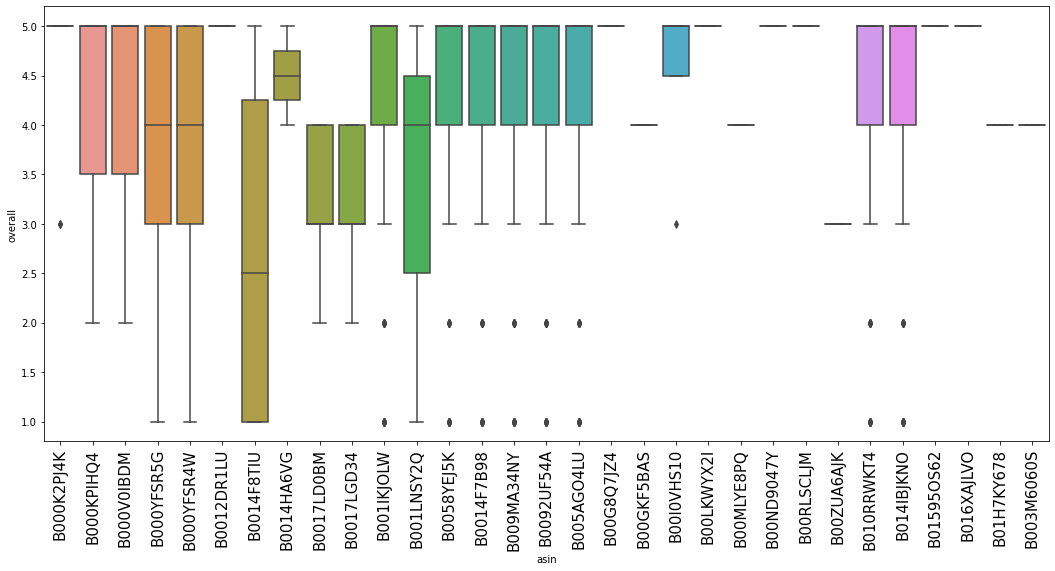

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df, x='asin', y='overall')
plt.xticks(rotation=90, size=15)

In [ ]:
product_review_count = df['asin'].value_counts()
product_review_count

B009MA34NY    377
B0092UF54A    376
B010RRWKT4    376
B005AGO4LU    376
B014IBJKNO    375
B0014F7B98    374
B0058YEJ5K    367
B001IKJOLW    365
B000YFSR5G     24
B000YFSR4W     18
B000K2PJ4K     10
B00RLSCLJM      9
B00G8Q7JZ4      8
B001LNSY2Q      7
B000V0IBDM      7
B000KPIHQ4      7
B0017LD0BM      5
B0017LGD34      5
B0014F8TIU      4
B00I0VHS10      4
B0014HA6VG      2
B00ND9047Y      2
B0012DR1LU      2
B01H7KY678      1
B016XAJLVO      1
B01595OS62      1
B00MLYE8PQ      1
B00ZUA6AJK      1
B00LKWYX2I      1
B00GKF5BAS      1
B003M6060S      1
Name: asin, dtype: int64

In [ ]:
RATINGS_CONFEDNECE_THRESHOLD = 10
less_confidance_products = product_review_count[product_review_count < RATINGS_CONFEDNECE_THRESHOLD].index
less_confidance_reviews = df[df['asin'].isin(less_confidance_products)]
less_confidance_reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,size,color
10,2.0,True,"01 25, 2018",A3HX4X3TIABWOV,B000KPIHQ4,Denise A. Conte,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,1516838400,NaN,NaN
11,2.0,True,"01 5, 2017",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,1483574400,NaN,NaN
12,5.0,True,"10 17, 2016",A265UZVOZWTTXQ,B000KPIHQ4,William_Jasper,We have used these inserts for years. They pr...,Great inserts,1476662400,NaN,NaN
13,5.0,True,"08 22, 2016",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,Pinnacle seems to have more cushioning so my h...,Personal favorite,1471824000,NaN,NaN
14,5.0,True,"03 23, 2016",A265UZVOZWTTXQ,B000KPIHQ4,William_Jasper,Excellent insole with good support.,Five Stars,1458691200,NaN,NaN
15,5.0,True,"06 24, 2015",AW8UBYMNJ894V,B000KPIHQ4,Cognizant Consumer,A little more cushion than the Powerstep Prote...,Great comfort!,1435104000,NaN,NaN
16,5.0,True,"11 17, 2014",A265UZVOZWTTXQ,B000KPIHQ4,William_Jasper,These insoles help my heels feel much better. ...,These insoles help my heel feels much better. ...,1416182400,NaN,NaN
17,2.0,True,"01 25, 2018",A3HX4X3TIABWOV,B000V0IBDM,Denise A. Conte,Relieved my Plantar Fascitis for 3 Days. Then ...,These were recommended by my Podiatrist,1516838400,NaN,NaN
18,2.0,True,"01 5, 2017",AW8UBYMNJ894V,B000V0IBDM,Cognizant Consumer,This is my 6th pair and they are the best thin...,Not the same as all my other pairs.,1483574400,NaN,NaN
19,5.0,True,"10 17, 2016",A265UZVOZWTTXQ,B000V0IBDM,William_Jasper,We have used these inserts for years. They pr...,Great inserts,1476662400,NaN,NaN


In [ ]:
df = df[~df['asin'].isin(less_confidance_products)]
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,size,color
0,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Orange
1,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Black (37467610) / Red/White
2,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Gray Logo
3,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue (37867638-99) / Yellow
4,5.0,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Pink
...,...,...,...,...,...,...,...,...,...,...,...
3171,5.0,True,"07 2, 2018",A2077NII5H62R2,B005AGO4LU,Amazon Customer,Perfect fit!,Five Stars,1530489600,8.5 B(M) US,Green Glow/Seaweed - Hasta - White
3172,5.0,True,"06 28, 2018",A2IBS6PIPAGAB5,B005AGO4LU,J. Avila,My favorite cross trainers!,Comfortable,1530144000,5 B(M) US,Wolf Grey/Black-pink Blast/White
3173,5.0,True,"06 25, 2018",A1GTC5EVSJNCQ8,B005AGO4LU,Amazon Customer,Love them fit perfect,Five Stars,1529884800,8 B(M) US,Blue Tint/Green Glow/Hasta/White
3174,5.0,True,"06 20, 2018",A311XHHLM12MUT,B005AGO4LU,Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,9 B(M) US,Blue Tint/Green Glow/Hasta/White


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

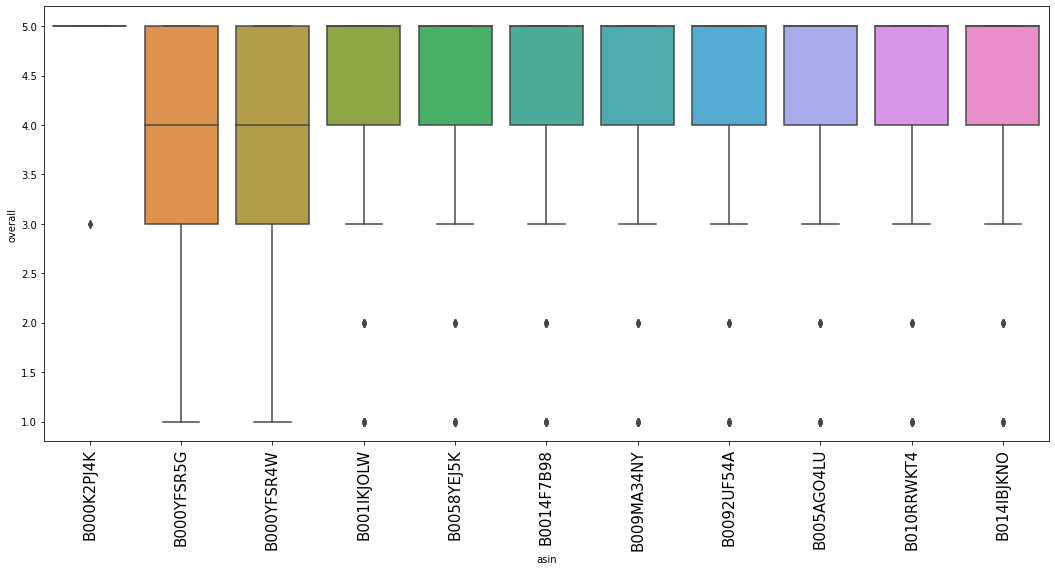

In [ ]:
plt.figure(figsize=(18,8))
sns.boxplot(data=df, x='asin', y='overall')
plt.xticks(rotation=90, size=15)

In [ ]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['reviewTime']

0      2015-09-04
1      2015-09-04
2      2015-09-04
3      2015-09-04
4      2015-09-04
          ...    
3171   2018-07-02
3172   2018-06-28
3173   2018-06-25
3174   2018-06-20
3175   2018-06-16
Name: reviewTime, Length: 3038, dtype: datetime64[ns]

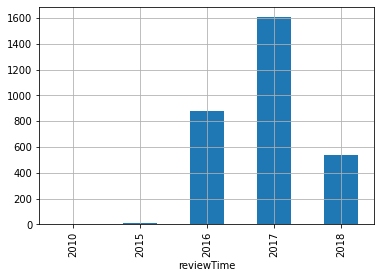

In [ ]:
df.groupby(df['reviewTime'].dt.year).count()['overall'].plot(kind="bar", grid=True)

In [ ]:
OLD_REVIEW_YEAR_THRESHOLD = 2016

old_reviews = df[pd.DatetimeIndex(df['reviewTime']).year < OLD_REVIEW_YEAR_THRESHOLD]
old_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,size,color
0,5.0,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Orange
1,5.0,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Black (37467610) / Red/White
2,5.0,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Gray Logo
3,5.0,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue (37867638-99) / Yellow
4,5.0,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Five Stars,1441324800,Big Boys,Blue/Pink


In [ ]:
df = df[pd.DatetimeIndex(df['reviewTime']).year >= OLD_REVIEW_YEAR_THRESHOLD]
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,size,color
24,1.0,True,2018-03-12,A3QY3THQ42WSCQ,B000YFSR5G,Amazon Customer,Waaaay too BIG,One Star,1520812800,X-Large,Charcoal Heather
25,5.0,True,2018-02-08,AGZ5OOZVDO194,B000YFSR5G,Amazon Customer,Comfortable,Five Stars,1518048000,XX-Large,Deep Royal
27,5.0,True,2017-10-25,A232J1FHOQI5YN,B000YFSR5G,Louis Robbio,Good product for the price. Used very day and...,Five Stars,1508889600,X-Large,Navy
28,5.0,True,2017-10-14,A2ON4RYI9Z4SQ,B000YFSR5G,Fhteacher,Good fit even after washing in hot water to fo...,Good fit,1507939200,Medium,Light Steel
29,1.0,True,2018-03-12,A3QY3THQ42WSCQ,B000YFSR4W,Amazon Customer,Waaaay too BIG,One Star,1520812800,X-Large,Charcoal Heather
...,...,...,...,...,...,...,...,...,...,...,...
3171,5.0,True,2018-07-02,A2077NII5H62R2,B005AGO4LU,Amazon Customer,Perfect fit!,Five Stars,1530489600,8.5 B(M) US,Green Glow/Seaweed - Hasta - White
3172,5.0,True,2018-06-28,A2IBS6PIPAGAB5,B005AGO4LU,J. Avila,My favorite cross trainers!,Comfortable,1530144000,5 B(M) US,Wolf Grey/Black-pink Blast/White
3173,5.0,True,2018-06-25,A1GTC5EVSJNCQ8,B005AGO4LU,Amazon Customer,Love them fit perfect,Five Stars,1529884800,8 B(M) US,Blue Tint/Green Glow/Hasta/White
3174,5.0,True,2018-06-20,A311XHHLM12MUT,B005AGO4LU,Peter,Favorite Nike shoe ever! The flex sole is exce...,Love them!,1529452800,9 B(M) US,Blue Tint/Green Glow/Hasta/White


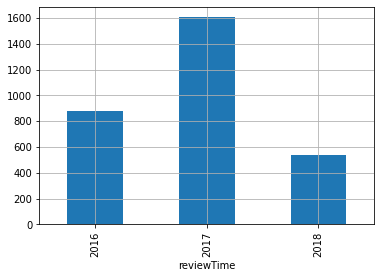

In [ ]:
df.groupby(df['reviewTime'].dt.year).count()['overall'].plot(kind="bar", grid=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3022 entries, 24 to 3175
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   overall         3022 non-null   float64       
 1   verified        3022 non-null   bool          
 2   reviewTime      3022 non-null   datetime64[ns]
 3   reviewerID      3022 non-null   object        
 4   asin            3022 non-null   object        
 5   reviewerName    3022 non-null   object        
 6   reviewText      3006 non-null   object        
 7   summary         3022 non-null   object        
 8   unixReviewTime  3022 non-null   int64         
 9   size            3009 non-null   object        
 10  color           3009 non-null   object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 262.7+ KB


(array([   0.,  108.,   76.,  312., 2526.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

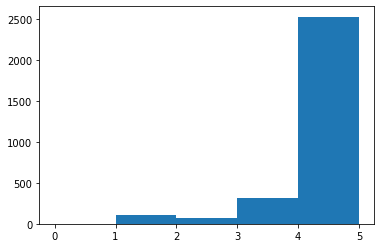

In [ ]:
plt.hist(df['overall'], bins=np.arange(0, 6))

In [ ]:
corr = df.corr()

In [ ]:
corr['verified']               # overall and verified has inverse and week correlation  however, verified and unixReviewTime has good correlation 
 

overall          -0.057224
verified          1.000000
unixReviewTime    0.141797
Name: verified, dtype: float64

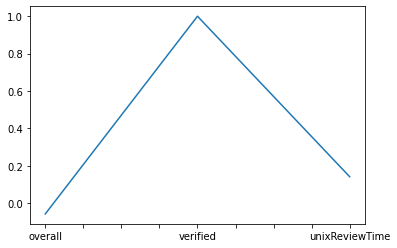

In [ ]:
corr['verified'].plot()

In [ ]:
corr['overall']

overall           1.000000
verified         -0.057224
unixReviewTime    0.010420
Name: overall, dtype: float64

In [ ]:
corr['overall']

overall           1.000000
verified         -0.057224
unixReviewTime    0.010420
Name: overall, dtype: float64

In [ ]:
df.corr()                                  # overall and verified has inverse and week correlation  however, verified and unixReviewTime has good correlation 

,overall,verified,unixReviewTime
overall,1.000000,-0.057224,0.010420
verified,-0.057224,1.000000,0.141797
unixReviewTime,0.010420,0.141797,1.000000


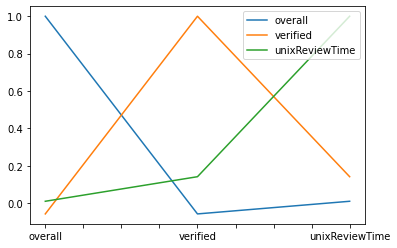

In [ ]:
df.corr().plot()

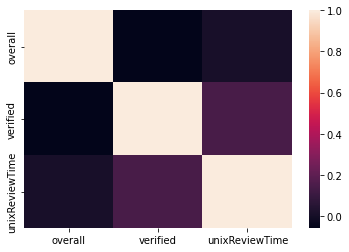

In [ ]:
ax = sns.heatmap(df.corr())
plt.show()

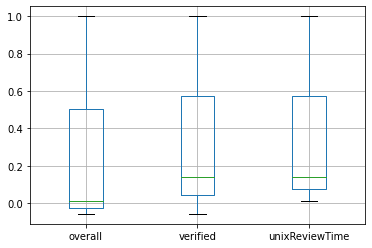

In [ ]:
corr.boxplot()

In [ ]:
from google.colab import  drive

drive.mount('/drive')

df.to_csv('/drive/My Drive/Datasets/amazon_fashion/cleaned_amazon_fashion.csv', index=False)

Mounted at /drive
